In [31]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import *
import scipy.special as sc
from matplotlib.colors import LinearSegmentedColormap

# Radiation inside the solenoid

In [32]:
# Introducing governing expressions

# sigma stationary
def sigma_st(c, l_C, sigma_L, sigma0, sigma0_inv, dsigma0):
  return sigma0/sqrt(2)*sqrt(1 + (sigma_L*sigma0_inv)**4 + (dsigma0*
    sigma_L**2/(c*l_C)*sigma0_inv)**2)

# Dispersion factor with quantum numbers n and l
def r_nl(sigma_st, n, l):
  return sigma_st*sqrt(2*n + abs(l) + 1)

# sin amplitude coefficient inside the dispersion function
def b(sigma_L, sigma_st_inv):
  return sqrt(1 - (sigma_L*sigma_st_inv)**4)

# Radiated power, averaged over the cyclotron period (eV/s)
def P(c, q, omega, b_r_nl2):
  return (omega**3*q*b_r_nl2)**2/(40*c**5)*1e+12/1.6

# OAM decay rate, averaged over the cyclotron period
def dL(c, q, omega, b_r_nl2):
  return omega**5*(q*b_r_nl2)**2/(120*c**5)

# Transverse energy of the electron
def E(quant, n, l, sigma_st, inv_sigma_L):
  return quant/2*((2*n+abs(l)+1)*(sigma_st*inv_sigma_L)**2 + l)

In [33]:
# Introducing variables

c = 3e+10 # speed of light (cm/s)
l_C = 2.426e-10/(2*pi) # reduced Compton wavelength (cm)
q = -4.8e-10 # electron charge (statC)
H = 1e+4 # solenoid magnetic field magnitude (G)
omega = q*H/(9.1e-28*c) # cyclotron frequency (angular) (rad/s)
n = 0 # radial quantum number
l = 10 # orbital quantum number
sigma_L = sqrt(2*c*1.054e-27/(abs(q)*H)) # dispersion of Landau level (cm)

#Scales
mm = 1e-1
um = 1e-4
nm = 1e-7
scales = {'nm':nm, r'$\mu$m': um, 'mm':mm}

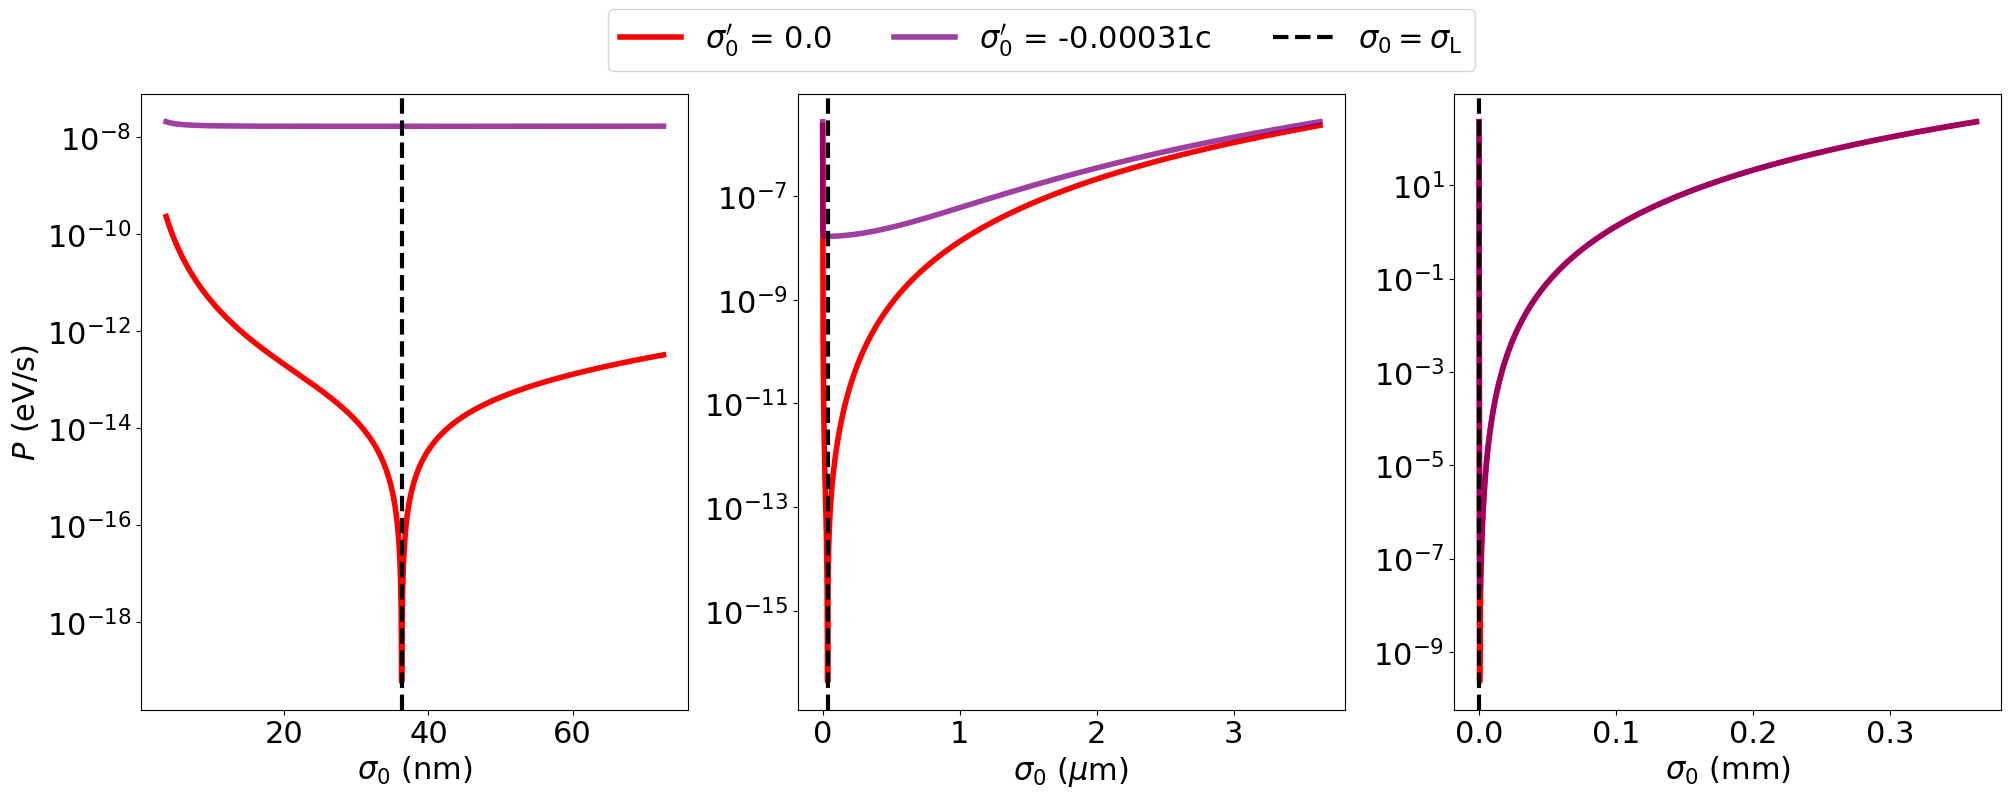

In [34]:
# Radiated power plots for different scales of initial dispersion of the
# wavepacket

fig, ax = plt.subplots(1, 3, figsize=(24, 8))

cmap = LinearSegmentedColormap.from_list("red_to_blue", ["red", "blue"])

dsigma0 = [0.0, -3.1e-4*c]
scale_names = list(scales.keys())
scale_values = list(scales.values())
down_mult = [1e-1, 1e-2, 1e-4]
top_mult = [2, 100, 10000]

for s in range(len(scale_values)):
  sigma0 = linspace(sigma_L*down_mult[s], sigma_L*top_mult[s], 1000)
  sigma0_inv = reciprocal(sigma0.astype(float))
  sigma0_scaled = sigma0/scale_values[s]
  count = 0
  for i in dsigma0:
    true_sigma_st = sigma_st(c, l_C, sigma_L, sigma0_scaled*scale_values[s],
                             sigma0_inv, i)
    sigma_st_inv = reciprocal(true_sigma_st.astype(float))
    true_r_nl = r_nl(true_sigma_st, n, l)
    true_b = b(sigma_L, sigma_st_inv)
    b_r_nl2 = multiply(true_b, true_r_nl**2)
    true_P = P(c, q, omega, b_r_nl2)
    plt.rc('font', **{'size':'22'})
    norm_count = count / 2
    count += 1
    alpha = 1.0 - 0.5 * norm_count
    color = cmap(norm_count)
    if i == 0:
      ax[s].plot(sigma0_scaled, true_P, label=r'$\sigma_0^\prime$'+
                 ' = {}'.format(round(i/c, 5)), color=color, alpha=alpha,
                 linewidth=4.0)
    else:
      ax[s].plot(sigma0_scaled, true_P, label=r'$\sigma_0^\prime$'+
                 ' = {}'.format(round(i/c, 5)) + 'c', color=color, alpha=alpha,
                 linewidth=4.0)
  ax[s].tick_params(axis='both', labelsize=22)
  ax[s].set_yscale('log')
  ax[s].set_xlabel(r'$\sigma_0$' + ' ({})'.format(scale_names[s]), size=22)
  if s == 0:
    ax[s].set_ylabel(r'$P$ (eV/s)', size=22)
  ax[s].axvline(x=sigma_L/scale_values[s], color="black", linestyle='dashed',
                linewidth=3.0, label=r'$\sigma_0 = \sigma_\text{L}$')

handles, labels = plt.gca().get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.005),
           ncols = len(dsigma0)+1)

plt.show()
if s != len(scale_values)-1:
  plt.clf()

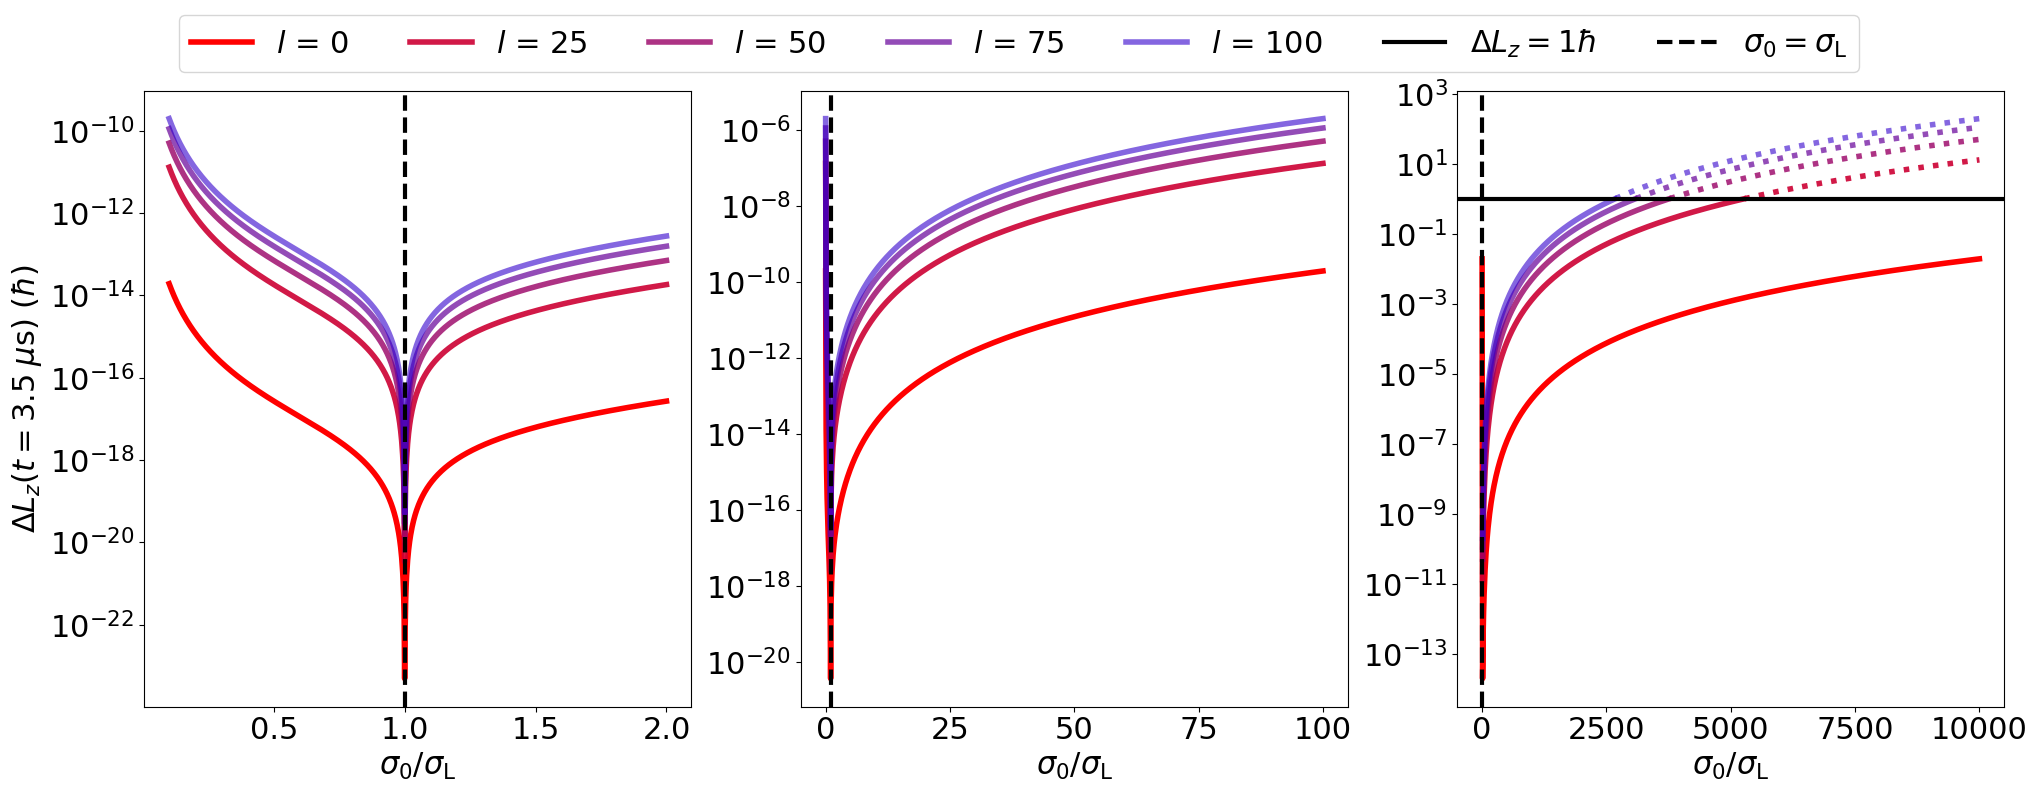

In [35]:
# Plots of radiated OAM per the acceleration time t inside a linac for different
# scales of ratio between the initial dispersion of the wavepacket and the
# Landau level dispersion

fig, ax = plt.subplots(1, 3, figsize=(24, 8))

cmap = LinearSegmentedColormap.from_list("red_to_blue", ["red", "blue"])

dsigma0 = [0.0, -4.4e-4*0.7*c]
scale_names = list(scales.keys())
scale_values = list(scales.values())
down_mult = [1e-1, 1e-2, 1e-4]
top_mult = [2, 100, 10000]

for s in range(len(scale_values)):
  sigma0 = linspace(sigma_L*down_mult[s], sigma_L*top_mult[s], 1000)
  sigma0_inv = reciprocal(sigma0.astype(float))
  sigma0_scaled = sigma0/sigma_L

  for l in range(0, 125, 25):
    true_sigma_st = sigma_st(c, l_C, sigma_L, sigma0_scaled*sigma_L,
                             sigma0_inv, 0)
    sigma_st_inv = reciprocal(true_sigma_st.astype(float))
    true_r_nl = r_nl(true_sigma_st, n, l)
    true_b = b(sigma_L, sigma_st_inv)
    b_r_nl2 = multiply(true_b, true_r_nl**2)
    L = -dL(c, q, omega, b_r_nl2)/(1.054e-27)*3.5e-6
    norm_l = l / 125.0
    alpha = 1.0 - 0.5 * norm_l
    color = cmap(norm_l)
    plt.rc('font', **{'size':'22'})
    if len(np.where(L >= 1e+0)[0]) > 0:
      ax[s].plot(sigma0_scaled[np.where((L >= 1e+0) & (sigma0_scaled <= 1))[0]],
                 L[np.where((L >= 1e+0) & (sigma0_scaled <= 1))[0]], color=color,
                 alpha=alpha, linestyle='dotted', linewidth=4.0)
      ax[s].plot(sigma0_scaled[np.where(L < 1e+0)[0]], L[np.where(L < 1e+0)[0]],
                 label=r'$l$'+f' = {l}', color=color, alpha=alpha,
                 linewidth=4.0)
      ax[s].plot(sigma0_scaled[np.where((L >= 1e+0) & (sigma0_scaled > 1))[0]],
                 L[np.where((L >= 1e+0) & (sigma0_scaled > 1))[0]], color=color,
                 alpha=alpha, linestyle='dotted', linewidth=4.0)
      s0 = sigma0[np.where((L >= 1e+0) & (sigma0_scaled > 1))[0]]
      if l == 100:
        ax[s].axhline(y=1, color="black", linewidth=3.0,
                      label=r'$\Delta L_z = 1 \hbar$')
    else:
      ax[s].plot(sigma0_scaled, L, label=r'$l$'+f' = {l}', color=color,
                 alpha=alpha, linewidth=4.0)
  ax[s].tick_params(axis='both', labelsize=22)
  ax[s].set_xlabel(r'$\sigma_0/\sigma_\text{L}$', size=22)
  if s == 0:
    ax[s].set_ylabel(r'$\Delta L_z \left(t = 3.5 \; \mu\text{s}\right)$ ($\hbar$)', size=22)
  ax[s].set_yscale('log')
  ax[s].axvline(x=1, color="black", linestyle='dashed',
                linewidth=3.0, label=r'$\sigma_0 = \sigma_\text{L}$')

handles, labels = plt.gca().get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncols = len(range(0, 125, 25))+2)

plt.show()
if s != len(scale_values)-1:
  plt.clf()

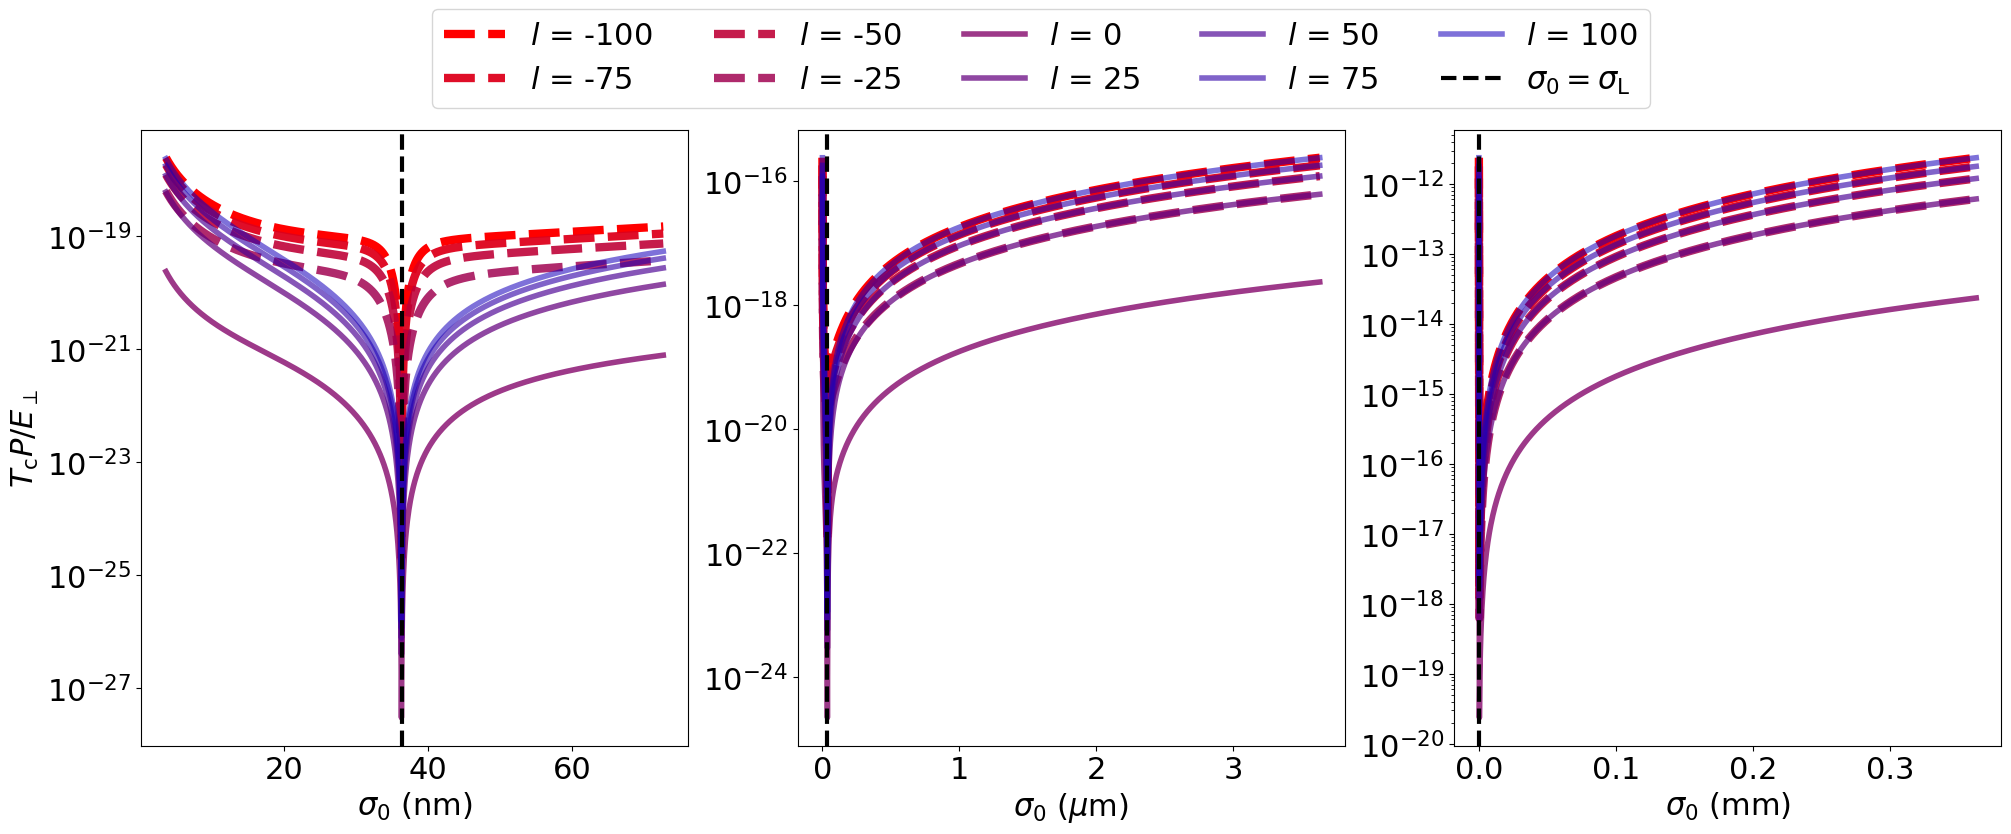

In [36]:
# Plots of the ratio between the energy radiated per single cyclotron period to
# the transverse energy of the wavepacket for different scales of initial
# dispersion of the wavepacket

fig, ax = plt.subplots(1, 3, figsize=(24, 8))

cmap = LinearSegmentedColormap.from_list("red_to_blue", ["red", "blue"])

dsigma0 = [0.0, -4.4e-4*0.7*c]
scale_names = list(scales.keys())
scale_values = list(scales.values())
down_mult = [1e-1, 1e-2, 1e-4]
top_mult = [2, 100, 10000]

for s in range(len(scale_values)):
  sigma0 = linspace(sigma_L*down_mult[s], sigma_L*top_mult[s], 1000)
  sigma0_inv = reciprocal(sigma0.astype(float))
  sigma0_scaled = sigma0/scale_values[s]
  for l in range(-100, 125, 25):
    true_sigma_st = sigma_st(c, l_C, sigma_L, sigma0_scaled*scale_values[s],
                             sigma0_inv, 0)
    sigma_st_inv = reciprocal(true_sigma_st.astype(float))
    true_r_nl = r_nl(true_sigma_st, n, l)
    true_b = b(sigma_L, sigma_st_inv)
    b_r_nl2 = multiply(true_b, true_r_nl**2)
    true_P = P(c, q, omega, b_r_nl2)
    Energy = E(1.054e-27*omega, n, l, true_sigma_st, 1/sigma_L)
    Eps = Energy*1e+12/1.6
    norm_l = (l + 100) / 225.0
    color = cmap(norm_l)
    brightness = 1.0 - 0.2 * norm_l
    adjusted_color = [c * brightness for c in color[:3]]
    alpha = 1.0 - 0.5 * norm_l
    linestyle = 'dashed' if l < 0 else 'solid'
    linewidth = 6.0 if l < 0 else 4.0
    plt.rc('font', **{'size':'22'})
    ax[s].plot(sigma0_scaled, multiply(true_P*2*pi/omega,
                                       reciprocal(Eps.astype(float))),
               color=adjusted_color, alpha=alpha, linestyle=linestyle,
               label=r'$l$'+f' = {l}', linewidth=linewidth)
  ax[s].tick_params(axis='both', labelsize=22)
  ax[s].set_xlabel(r'$\sigma_0$' + ' ({})'.format(scale_names[s]), size=22)
  if s == 0:
    ax[s].set_ylabel(r'$T_{\text{c}} P / E_{\perp}$', size=22)
  ax[s].set_yscale('log')
  ax[s].axvline(x=sigma_L/scale_values[s], color="black", linestyle='dashed',
                linewidth=3.0, label=r'$\sigma_0 = \sigma_\text{L}$')

handles, labels = plt.gca().get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.05),
           ncols = (len(range(-100, 125, 25))+1)/2)

plt.show()
if s != len(scale_values)-1:
  plt.clf()

# Effect of fringent fields

In [37]:
# Expressions for radiated power and OAM loss rate driven by fringe effects

# Dispersion sign function
def sign_disp(sigma_L, sigma0, dsigma0):
  signum = []
  for i in range(len(sigma0)):
    if dsigma0 != 0:
      signum.append(np.sign(dsigma0))
    elif dsigma0 == 0 and sigma0[i] != sigma_L:
      signum.append(np.sign(sigma_L - sigma0[i]))
    elif dsigma0 == 0 and sigma0[i] == sigma_L:
      signum.append(0)
  return np.array(signum)

# Radiated power, averaged over the transit time T (eV/s)
def P_transition(c, q, omega, b_r_nl2, T, signum):
  return omega**2*q**2*b_r_nl2**2/(12*T**2*c**5)*(4*omega**2*T**2/5 + 1 +
                                                  9/16*np.sqrt(omega*T/np.pi)*
                                                  sc.fresnel(2*np.sqrt(omega*T/np.pi))[1] +
                                                  (signum-3)/8*np.cos(2*omega*T) -
                                                  omega*T/2*np.sin(2*omega*T))*1e+12/1.6

# Interference terms of OAM decay rate not proportional to average momentum p0,
# averaged over the transit time T
def dL_int(c, q, omega, b_r_nl2, m, T, signum, sigma_z):
  return omega*q**2/(4*c**3)*(2*signum*omega*b_r_nl2/(3*T)*
                              ((1.054e-27)**2/(5*sigma_z**2*m**2*c**2) - 2)*
                              np.cos(omega*T) + omega**2*b_r_nl2**2/(15*T**2*c**2)*
                              (4*omega**2*T**2/5 + 1 + 9/16*np.sqrt(np.pi/(omega*T))*
                               sc.fresnel(2*np.sqrt(omega*T/np.pi))[1] +
                               (signum-3)/8*np.cos(2*omega*T) - omega*T/2*np.sin(2*omega*T)))

# Interference terms of OAM decay rate proportional to average momentum p0,
# averaged over the transit time T
def dL_int_p0(c, q, omega, b_r_nl2, m, T, signum, p0):
  return signum*np.pi*omega**2*q**2*b_r_nl2*p0**2/(64*T*m**2*c**4)*np.cos(omega*T)

# Radiative terms of OAM decay rate, averaged over the transit time T
def dL_rad(c, q, omega, b_r_nl2, m, T, R0):
  return 5*np.pi*omega**2*q**2*b_r_nl2**2*R0/(256*T**3*c**6)*(omega*T*np.sin(2*omega*T) +
                                                              (1 - 2*omega**2*T**2)*
                                                              (np.sin(omega*T))**2)

# OAM decay rate in fringent region, averaged over the transit time T
def dL_transition(c, q, omega, b_r_nl2, m, T, signum, p0, sigma_z, R0):
  return dL_rad(c, q, omega, b_r_nl2, m, T, R0) + dL_int(c, q, omega, b_r_nl2, m, T, signum, sigma_z) + dL_int_p0(c, q, omega, b_r_nl2, m, T, signum, p0)

In [38]:
# Introducing additional variables

m = 9.1e-28 # mass of the electron (g)
p0 = 0.7*m*c # average momentum of the wave packet (g*cm/s)
sigma_z = 100e-7 # longitudinal size dispersion (cm)
L_sol = 1000 # length of the solenoid (cm)
R0 = 10*L_sol # distance from the center of stationary reference frame to the
          # observation point (cm)

# Transit parameters
D = 1 # solenoid diameter (cm)
t_trans = 2*D/(p0/m) # transit time (s)

In [39]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


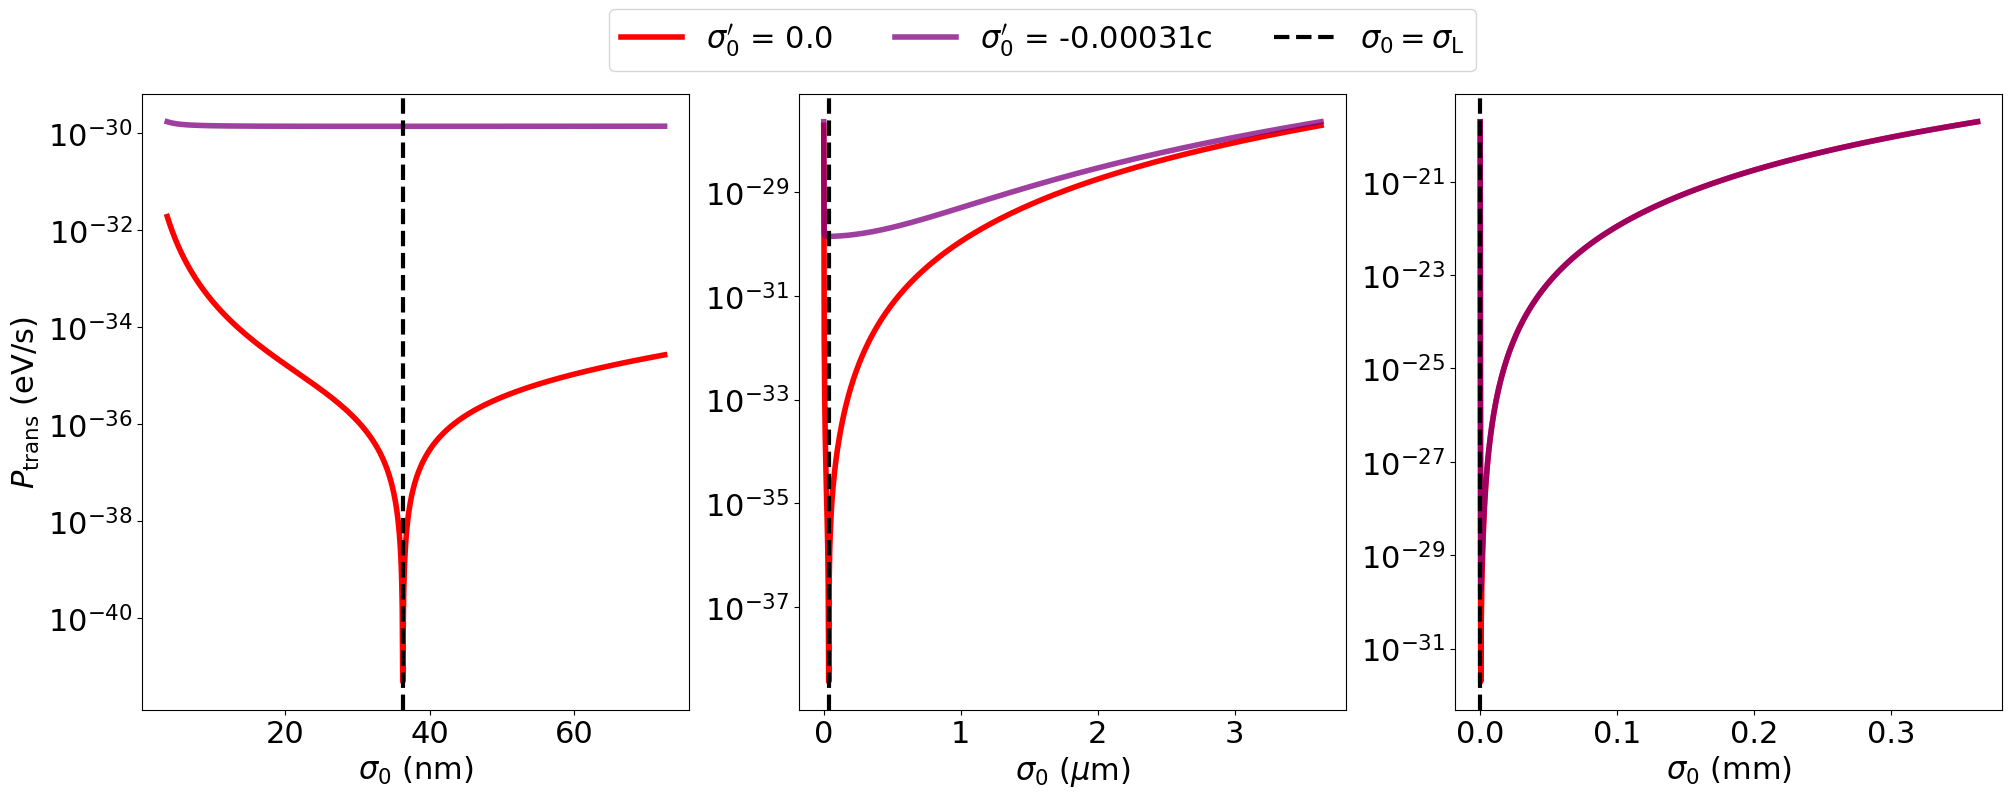

In [40]:
# Radiated power plots for different scales of initial dispersion of the
# wavepacket

l = 10

fig, ax = plt.subplots(1, 3, figsize=(24, 8))

cmap = LinearSegmentedColormap.from_list("red_to_blue", ["red", "blue"])

dsigma0 = [0.0, -3.1e-4*c]
scale_names = list(scales.keys())
scale_values = list(scales.values())
down_mult = [1e-1, 1e-2, 1e-4]
top_mult = [2, 100, 10000]

def signum(sigma0, dsigma0, sigma_L):
    if dsigma0 != 0:
        return np.sign(dsigma0)
    elif dsigma0 == 0:
        return np.sign(sigma_L - sigma0)
    elif dsigma0 == 0 and sigma0 == sigma_L:
        return 0

for s in range(len(scale_values)):
  sigma0 = linspace(sigma_L*down_mult[s], sigma_L*top_mult[s], 1000)
  sigma0_inv = reciprocal(sigma0.astype(float))
  sigma0_scaled = sigma0/scale_values[s]
  count = 0
  for i in dsigma0:
    true_sigma_st = sigma_st(c, l_C, sigma_L, sigma0_scaled*scale_values[s],
                             sigma0_inv, i)
    sigma_st_inv = reciprocal(true_sigma_st.astype(float))
    true_r_nl = r_nl(true_sigma_st, n, l)
    true_b = b(sigma_L, sigma_st_inv)
    b_r_nl2 = multiply(true_b, true_r_nl**2)
    true_P = P_transition(c, q, np.abs(omega), b_r_nl2, t_trans, signum(sigma0, i, sigma_L))
    plt.rc('font', **{'size':'22'})
    norm_count = count / 2
    count += 1
    alpha = 1.0 - 0.5 * norm_count
    color = cmap(norm_count)
    if i == 0:
      ax[s].plot(sigma0_scaled, true_P, label=r'$\sigma_0^\prime$'+
                 ' = {}'.format(round(i/c, 5)), color=color, alpha=alpha,
                 linewidth=4.0)
    else:
      ax[s].plot(sigma0_scaled, true_P, label=r'$\sigma_0^\prime$'+
                 ' = {}'.format(round(i/c, 5)) + 'c', color=color, alpha=alpha,
                 linewidth=4.0)
  ax[s].tick_params(axis='both', labelsize=22)
  ax[s].set_yscale('log')
  ax[s].set_xlabel(r'$\sigma_0$' + ' ({})'.format(scale_names[s]), size=22)
  if s == 0:
    ax[s].set_ylabel(r'$P_\text{trans}$ (eV/s)', size=22)
  ax[s].axvline(x=sigma_L/scale_values[s], color="black", linestyle='dashed',
                linewidth=3.0, label=r'$\sigma_0 = \sigma_\text{L}$')

handles, labels = plt.gca().get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.005),
           ncols = len(dsigma0)+1)

plt.show()
if s != len(scale_values)-1:
  plt.clf()

/tmp/ipython-input-1891420535.py:152: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.04, 1, 0.90])


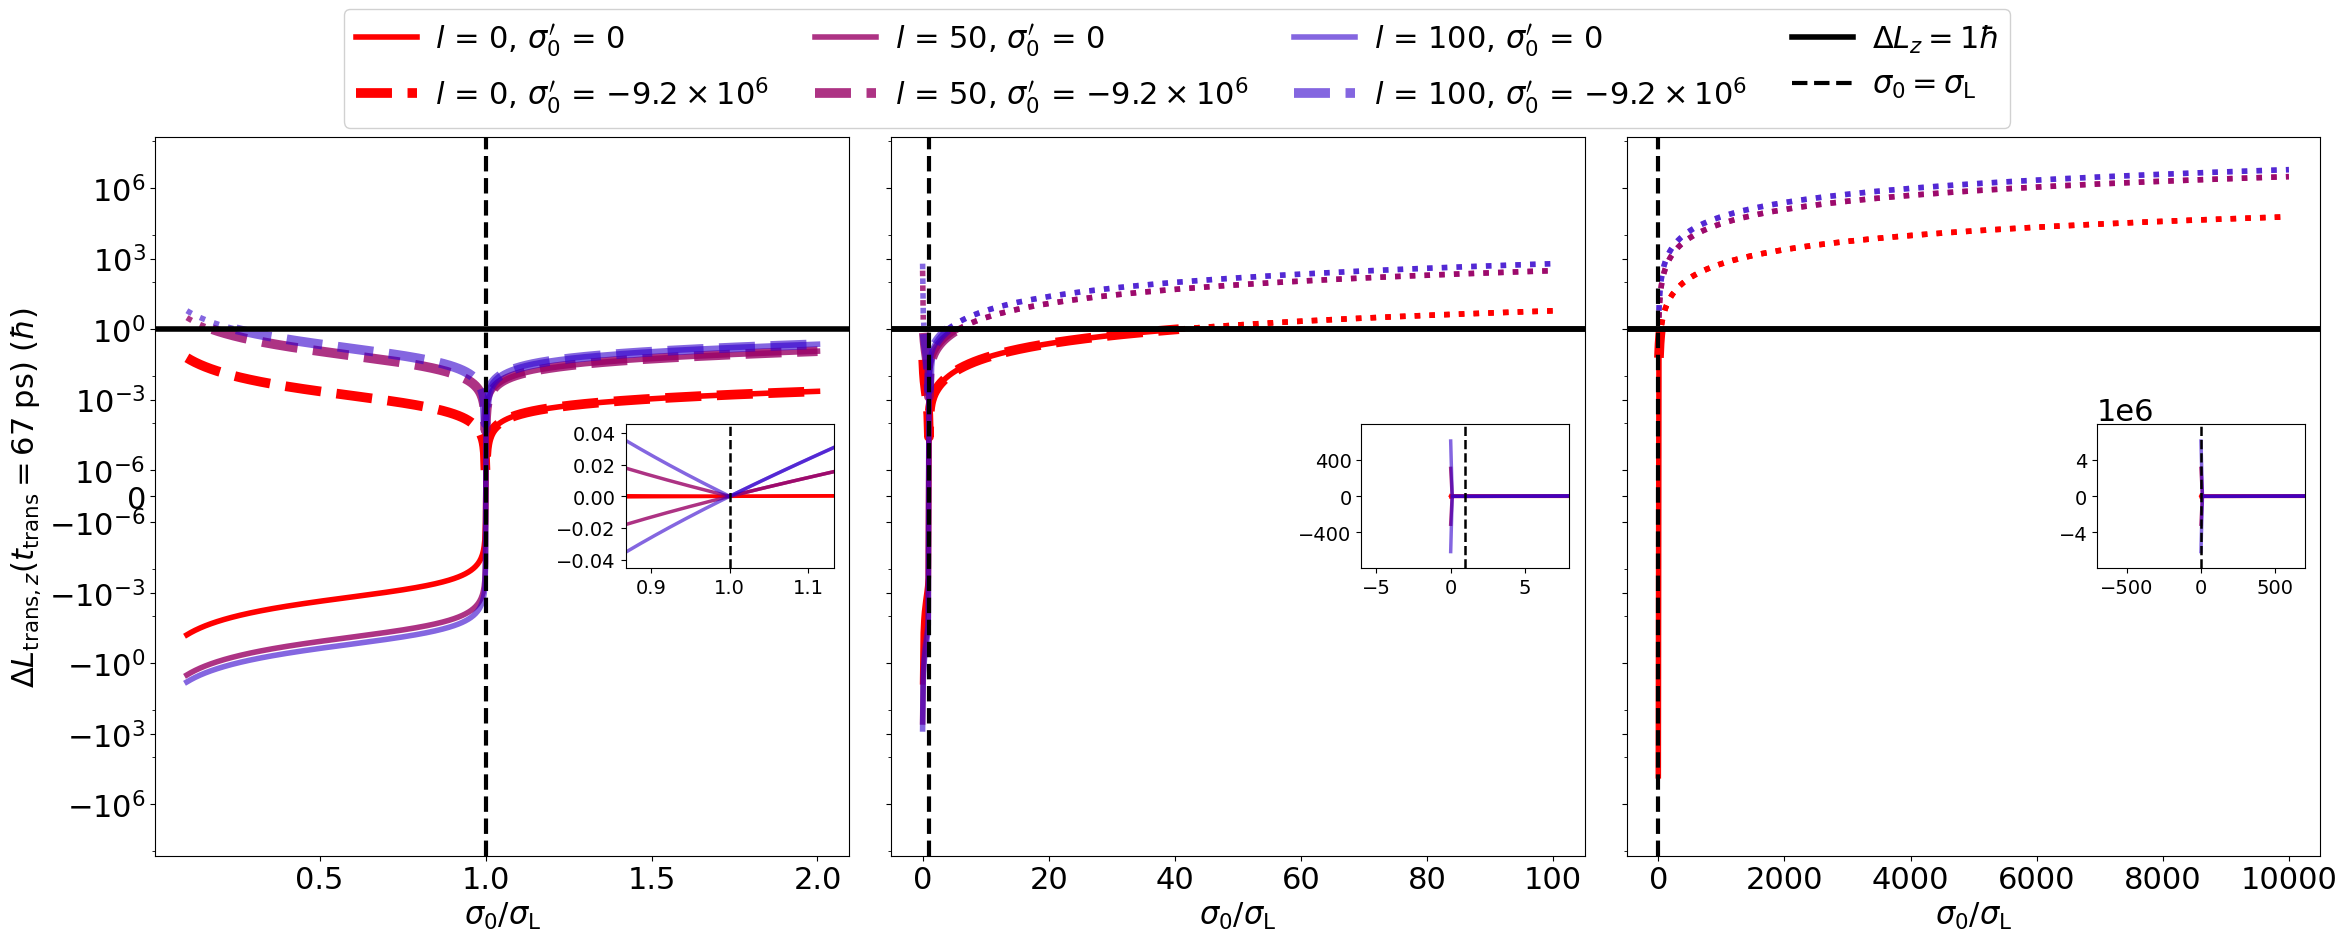

In [41]:
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from numpy import linspace, multiply, reciprocal, inf, minimum, maximum, abs as np_abs
import numpy as np
import math
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.ticker import SymmetricalLogLocator, AutoLocator, MaxNLocator

plt.rc('text', usetex=False)
plt.rc('font', **{'size': 22})

cmap = LinearSegmentedColormap.from_list("red_to_blue", ["red", "blue"])

dsigma0 = [0.0, -4.4e-4 * 0.7 * c]
scale_names  = list(scales.keys())
scale_values = list(scales.values())

down_mult = [1e-1, 1e-2, 1e-4]
top_mult  = [2, 100, 10000]

m       = 9.1e-28
p0      = 0.7 * m * c
T       = 2 * 1 / (p0 / m)             # or t_trans = 67e-12
sigma_z = 100e-7
R0      = 10 * 1000

fig, axes = plt.subplots(1, 3, figsize=(24, 10), sharey=True)
all_legend_handles = []
for s, ax in enumerate(axes):
    sigma0        = linspace(sigma_L * down_mult[s], sigma_L * top_mult[s], 1000)
    sigma0_inv    = reciprocal(sigma0.astype(float))
    sigma0_scaled = sigma0 / sigma_L
    inset_data = []
    panel_handles = []
    for l in range(0, 150, 50):
        for d in dsigma0:
            true_sigma_st = sigma_st(c, l_C, sigma_L, sigma0, sigma0_inv, 0)
            sigma_st_inv = reciprocal(true_sigma_st.astype(float))
            true_r_nl = r_nl(true_sigma_st, n, l)
            true_b = b(sigma_L, sigma_st_inv)
            b_r_nl2 = multiply(true_b, true_r_nl**2)
            L = dL_transition(c, q, np_abs(omega), b_r_nl2, m, T,
                              sign_disp(sigma_L, sigma0, d), p0, sigma_z, R0) * T / (1.054e-27)
            norm_l = l / 125.0
            alpha  = 1.0 - 0.5 * norm_l
            color  = cmap(norm_l)
            if d == 0:
                d_label = "0"
            else:
                exp   = math.floor(math.log10(abs(d)))
                coeff = d / (10 ** exp)
                d_label = f"${coeff:.1f}\\times10^{{{exp}}}$"
            label = rf"$l$ = {l}, $\sigma_0^\prime$ = {d_label}"
            if d >= 0:
                main_ls = 'solid'
                main_lw = 4.0
            else:
                main_ls = 'dashed'
                main_lw = 7.0
            mask_ge1   = L >= 1.0
            mask_lt1   = L <  1.0
            mask_right = sigma0_scaled > 1.0
            if mask_lt1.any():
                h_main, = ax.plot(
                    sigma0_scaled[mask_lt1], L[mask_lt1],
                    color=color, alpha=alpha,
                    linestyle=main_ls, linewidth=main_lw,
                    label=label
                )
                panel_handles.append(h_main)
                all_legend_handles.append(h_main)
            if mask_ge1.any():
                m_left = mask_ge1 & (~mask_right)
                if m_left.any():
                    ax.plot(sigma0_scaled[m_left], L[m_left],
                            color=color, alpha=alpha,
                            linestyle='dotted', linewidth=4.0)
                m_right = mask_ge1 & mask_right
                if m_right.any():
                    ax.plot(sigma0_scaled[m_right], L[m_right],
                            color=color, alpha=alpha,
                            linestyle='dotted', linewidth=4.0)
                if l == 100:
                    h_hline = ax.axhline(
                        y=1, color="black", linewidth=4.0,
                        label=r'$\Delta L_z = 1 \hbar$'
                    )
                    panel_handles.append(h_hline)
                    all_legend_handles.append(h_hline)
            inset_data.append((sigma0_scaled, L, color, alpha, float(d), l))
    h_vline = ax.axvline(
        x=1, color="black", linestyle='dashed',
        linewidth=3.0, label=r'$\sigma_0 = \sigma_\text{L}$'
    )
    all_legend_handles.append(h_vline)
    inset_ax = inset_axes(ax, width="30%", height="20%", loc='center right')
    x_center = 1.0
    x_range  = (sigma0_scaled[-1] - sigma0_scaled[0]) * 0.07
    x_min, x_max = x_center - x_range, x_center + x_range
    y_min, y_max = inf, -inf
    for x_data, y_data, _, _, _, _ in inset_data:
        mask = (x_data >= x_min) & (x_data <= x_max)
        if mask.any():
            y_min = minimum(y_min, y_data[mask].min())
            y_max = maximum(y_max, y_data[mask].max())
    if y_min == inf or y_max == -inf:
        y_min, y_max = -0.1, 0.1
    y_margin = (y_max - y_min) * 0.15 if y_max != y_min else 0.1
    inset_ax.set_ylim(y_min - y_margin, y_max + y_margin)
    for x_data, y_data, color, alpha, _, _ in inset_data:
        mask = (x_data >= x_min) & (x_data <= x_max)
        inset_ax.plot(x_data[mask], y_data[mask],
                      color=color, linestyle='solid', linewidth=2.5, alpha=alpha)
    inset_ax.axvline(x=1.0, color="black", linestyle='dashed', lw=1.8)
    inset_ax.set_xlim(x_min, x_max)
    inset_ax.xaxis.set_major_locator(AutoLocator())
    inset_ax.yaxis.set_major_locator(MaxNLocator(nbins=5))
    inset_ax.tick_params(axis='both', which='major', labelsize=14)

    linthresh = 1e-6
    ax.set_yscale('symlog', linthresh=linthresh)
    locator = SymmetricalLogLocator(base=1000, linthresh=linthresh)
    ax.yaxis.set_major_locator(locator)
    ax.tick_params(axis='both', labelsize=22)
    ax.set_xlabel(r'$\sigma_0 / \sigma_\text{L}$', size=22)
    if s == 0:
        ax.set_ylabel(r'$\Delta L_{\text{trans}, z} \left(t_\text{trans} = 67 \; \text{ps}\right)$ ($\hbar$)', size=22)

if all_legend_handles:
    unique_h = []
    unique_l = []
    seen = set()
    for h in all_legend_handles:
        lbl = h.get_label()
        if lbl and lbl not in seen:
            seen.add(lbl)
            unique_h.append(h)
            unique_l.append(lbl)
    n_items = len(unique_h)
    ncols = max(np.array([2, math.ceil(n_items / 2)]))
    fig.legend(
        handles=unique_h,
        labels=unique_l,
        loc='upper center',
        bbox_to_anchor=(0.5, 1.01),
        ncol=ncols,
        fontsize=22,
        framealpha=0.9,
        columnspacing=1.5,
        handletextpad=0.6
    )
plt.tight_layout(rect=[0, 0.04, 1, 0.90])

plt.show()
if s != len(scale_values)-1:
  plt.clf()